In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# This link is the direct source from the UCI Machine Learning Repository.
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

# The raw data doesn't have headers, so we define them manually
columns = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
           'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
           'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']


dataframe = pd.read_csv(url, names=columns)

print(f"Total Patients: {len(dataframe)}")
print(f"Features per Patient: {len(dataframe.columns) - 2}")

Total Patients: 569
Features per Patient: 30


In [66]:
dataframe.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [67]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [68]:
dataframe.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#Data Preprocessing

In [69]:
dataframe.drop('id', axis=1, inplace=True)

In [70]:
label_encoder = LabelEncoder()
dataframe['diagnosis'] = label_encoder.fit_transform(dataframe['diagnosis'])

In [71]:
X = dataframe.drop('diagnosis', axis = 1)
y = dataframe['diagnosis']

In [72]:
#Split to Train(80%) & Test(20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [73]:
#Scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [74]:
print(X_train)

[[-1.44075296 -0.43531947 -1.36208497 ...  0.9320124   2.09724217
   1.88645014]
 [ 1.97409619  1.73302577  2.09167167 ...  2.6989469   1.89116053
   2.49783848]
 [-1.39998202 -1.24962228 -1.34520926 ... -0.97023893  0.59760192
   0.0578942 ]
 ...
 [ 0.04880192 -0.55500086 -0.06512547 ... -1.23903365 -0.70863864
  -1.27145475]
 [-0.03896885  0.10207345 -0.03137406 ...  1.05001236  0.43432185
   1.21336207]
 [-0.54860557  0.31327591 -0.60350155 ... -0.61102866 -0.3345212
  -0.84628745]]


In [75]:
print(y_train)

68     0
181    1
63     0
248    0
60     0
      ..
71     0
106    0
270    0
435    1
102    0
Name: diagnosis, Length: 455, dtype: int64


In [76]:
print(X_test)

[[-0.46649743 -0.13728933 -0.44421138 ... -0.19435087  0.17275669
   0.20372995]
 [ 1.36536344  0.49866473  1.30551088 ...  0.99177862 -0.561211
  -1.00838949]
 [ 0.38006578  0.06921974  0.40410139 ...  0.57035018 -0.10783139
  -0.20629287]
 ...
 [-0.73547237 -0.99852603 -0.74138839 ... -0.27741059 -0.3820785
  -0.32408328]
 [ 0.02898271  2.0334026   0.0274851  ... -0.49027026 -1.60905688
  -0.33137507]
 [ 1.87216885  2.80077153  1.80354992 ...  0.7925579  -0.05868885
  -0.09467243]]


In [77]:
print(y_test)

204    0
70     1
131    1
431    0
540    0
      ..
486    0
75     1
249    0
238    0
265    1
Name: diagnosis, Length: 114, dtype: int64


#ANN Model

In [78]:
model = Sequential([

                    #30 neurons
                    Dense(30, activation = 'relu', input_shape=(30,)),

                    #hidden layer 1
                    Dense(16, activation = 'relu'),
                    Dropout(0.5),

                    #hidden layer 2
                    Dense(8, activation = 'relu'),
                    Dropout(0.5),

                    #output layer 1 - probabilty
                    Dense(1, activation = 'sigmoid')
                    ])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#Model Training

In [88]:
history = model.fit(X_train, y_train, epochs=50, batch_size = 32, validation_split = 0.1, verbose = 0)

#Evaluation

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9794 - loss: 0.1232

🚀 Test Set Accuracy: 98.25%


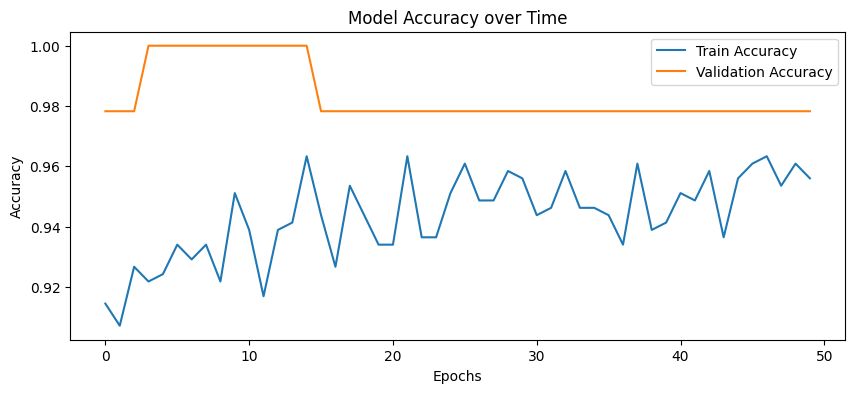

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


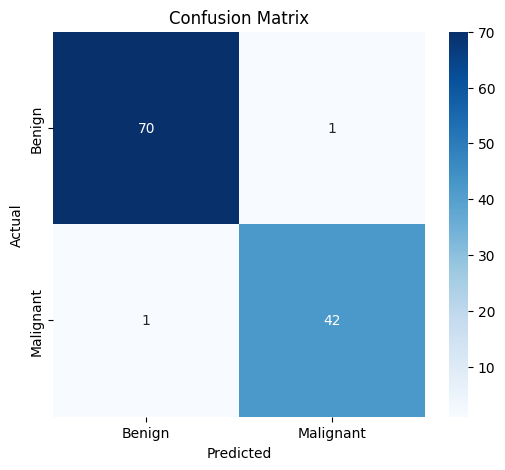

In [89]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n🚀 Test Set Accuracy: {accuracy * 100:.2f}%")

# Visualize the Training History
plt.figure(figsize=(10, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Time')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Visualize Confusion Matrix
y_pred = (model.predict(X_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#Prediction

In [95]:
# Pick a random patient from the test set
# (In a real app, this data would come from a doctor's input form)
import random
random_index = random.randint(0, len(X_test) - 1)

# Get the patient's data (features) and actual diagnosis
new_patient_data = X_test[random_index].reshape(1, -1) # Reshape for the model
actual_diagnosis = "Malignant (Cancer)" if y_test.iloc[random_index] == 1 else "Benign (Safe)"

# 2. Ask the Model to Predict
prediction_prob = model.predict(new_patient_data)
prediction_class = "Malignant (Cancer)" if prediction_prob > 0.5 else "Benign (Safe)"

# 3. Show the Results
print("-" * 30)
print(f"🏥 PATIENT REPORT (Index: {random_index})")
print("-" * 30)
print(f"🔍 Model's Probability: {prediction_prob[0][0]*100:.2f}% Chance of Cancer")
print(f"🤖 AI Prediction:       {prediction_class}")
print(f"✅ Actual Diagnosis:    {actual_diagnosis}")
print("-" * 30)

if prediction_class == actual_diagnosis:
    print("The AI was correct.")
else:
    print("The AI made a mistake.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
------------------------------
🏥 PATIENT REPORT (Index: 10)
------------------------------
🔍 Model's Probability: 10.82% Chance of Cancer
🤖 AI Prediction:       Benign (Safe)
✅ Actual Diagnosis:    Benign (Safe)
------------------------------
The AI was correct.


In [99]:
# PREDICT A SPECIFIC PATIENT
# 1. Enter the Patient ID you want to check (0 to 113)
patient_id = 68

# 2. Get that specific patient's data
# We use .iloc to get the row by number
patient_data = X_test[patient_id]
actual_diagnosis = y_test.iloc[patient_id]

# 3. Reshape and Predict
# The model expects a batch, so we reshape it to (1, 30)
input_data = patient_data.reshape(1, -1)
prediction_prob = model.predict(input_data, verbose=0)[0][0]

# 4. Display Results
print(f"\nAnalyzing Patient ID: {patient_id}")
print("-" * 30)
print(f"Probability of Cancer: {prediction_prob:.4f} ({prediction_prob*100:.2f}%)")

if prediction_prob > 0.5:
    print("AI Prediction:         MALIGNANT (Cancer)")
else:
    print("AI Prediction:         BENIGN (Safe)")

print(f"Actual Diagnosis:      {'MALIGNANT' if actual_diagnosis == 1 else 'BENIGN'}")

if (prediction_prob > 0.5) == actual_diagnosis:
    print("Result:                CORRECT")
else:
    print("Result:                INCORRECT")


Analyzing Patient ID: 68
------------------------------
Probability of Cancer: 0.0001 (0.01%)
AI Prediction:         BENIGN (Safe)
Actual Diagnosis:      BENIGN
Result:                CORRECT
